In [1]:
import numpy as np
from matplotlib import pyplot as plt

from ase.io import read
from ase.lattice.spacegroup import Spacegroup
from ase.lattice.spacegroup import crystal

from scipy.optimize import minimize

from dftpy.ions import Ions
from dftpy.functional import Functional
from dftpy.formats import io
from dftpy.ions import Ions
from dftpy.field import DirectField
from dftpy.grid import DirectGrid
from dftpy.functional import LocalPseudo, Functional, TotalFunctional, ExternalPotential
from dftpy.formats import io
from dftpy.math_utils import ecut2nr
from dftpy.optimization import Optimization

from ase.build import bulk


/opt/homebrew/lib/python3.11/site-packages/ase/lattice/spacegroup.py:5: UserWarning: Moved to ase.spacegroup
  warnings.warn('Moved to ase.spacegroup')


In [2]:
path_pp='/Users/valeria/Documents/PP/ofpp/EAC/upf/blps/'
file='si.lda.upf'
PP_list = {'Si': path_pp+file}

In [8]:
def min_delta_rho(x0, *args):
    rho_ks, ions = args
    KE = Functional(type='KEDF',name='WT', rho0=x0)
    ions.set_charges(4)
    grid = DirectGrid(lattice=ions.cell, nr=[len(rho_ks),len(rho_ks),len(rho_ks[0,0])])
    rho_ini = DirectField(grid=grid)
    rho_ini[:] = ions.get_ncharges()/ions.cell.volume
    PSEUDO = LocalPseudo(grid = grid, ions=ions, PP_list=PP_list, rcut=10)
    evaluator = TotalFunctional(KE=KE, XC=XC, HARTREE=HARTREE, PSEUDO=PSEUDO)
    optimization_options = {'econv' : 1e-5*ions.nat}
    opt = Optimization(EnergyEvaluator=evaluator, optimization_options = optimization_options, 
                       optimization_method = 'TN')
    rho = opt.optimize_rho(guess_rho=rho_ini)
    diff = 0.5 * (np.abs(rho - rho_ks)).integral()
    print('Results: ', x0, diff)
    
    return diff

In [9]:
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')

rho_ks = io.read_density('rho.xsf')
inputfile ='Si.in'
material = read(inputfile, format='espresso-in')
ions = Ions.from_ase(material) 

In [ ]:
rho0 = [0.01, 0.02176769, 0.025, 0.03, 0.035, 0.04, 0.045]
diff = []
for i in rho0:
    diff.append(min_delta_rho(i, rho_ks, ions))

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       2.002351E-01    
!WARN: Change to steepest decent
1       -3.184709879701E+00     -1.278036E+00   2.140814E+01    1       4       6.847441E-01    
2       -3.734588376627E+00     -5.498785E-01   1.998241E+00    5       1       1.041863E+00    
3       -3.743438962097E+00     -8.850585E-03   8.460049E-01    13      1       2.032023E+00    
4       -3.748398658255E+00     -4.959696E-03   8.872562E-01    12      1       2.761783E+00    
5       -4.025207432906E+00     -2.768088E-01   3.474995E-01    21      5       4.348647E+00    
6       -4.047815491583E+00     -2.260806E-02   1.261596E-01    12      1       5.012069E+00    
7       -4.053836145687E+00     -6.020654E-03   3.222533E-02    15      1       5.955152E+00    
8       -4.0583386

6       -3.734277282164E+00     -1.215947E-04   1.695331E-02    12      1       3.548665E+00    
7       -3.734370922179E+00     -9.364001E-05   1.718551E-02    12      1       4.183228E+00    
8       -3.734451685541E+00     -8.076336E-05   1.324051E-02    12      1       4.824643E+00    
9       -3.734524253151E+00     -7.256761E-05   1.361426E-02    14      1       5.553088E+00    
10      -3.743538115227E+00     -9.013862E-03   7.839514E-03    38      5       7.650626E+00    
11      -3.744345381234E+00     -8.072660E-04   2.619022E-03    14      1       8.391023E+00    
12      -3.744451392350E+00     -1.060111E-04   3.784397E-04    14      1       9.140735E+00    
13      -3.744453147878E+00     -1.755527E-06   1.998787E-04    12      1       9.784099E+00    
14      -3.744517669357E+00     -6.452148E-05   1.652054E-04    23      5       1.116677E+01    
15      -3.744526952999E+00     -9.283642E-06   4.475983E-05    15      1       1.195988E+01    
16      -3.744529459530E+00   

Chemical potential (eV)  : -3.69569817952256
Results:  0.03 0.16828016653642394
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       1.015310E-01    
!WARN: Change to steepest decent
1       -3.033762179020E+00     -1.127089E+00   1.867352E+01    1       4       3.652651E-01    
2       -3.486938444965E+00     -4.531763E-01   1.566148E+00    5       1       6.566451E-01    
3       -3.493640772220E+00     -6.702327E-03   6.292167E-01    15      1       1.440416E+00    
4       -3.497406311102E+00     -3.765539E-03   6.803598E-01    14      1       2.177308E+00    
5       -3.500409612631E+00     -3.003302E-03   4.394455E-01    18      1       3.114207E+00    
6       -3.660150707093E+00     -1.597411E-01   3.086192E-01    18      6       4.287397E+00    
7       -3.667828271224E+00     -7.

In [ ]:
plt.plot(rho0, diff)

In [10]:
minn = minimize(min_delta_rho, 0.01, args = (rho_ks, ions), method='Powell', bounds=[[0,1]], options={'ftol' : 1e-3})

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       9.068608E-02    
!WARN: Change to steepest decent
1       -3.184709879701E+00     -1.278036E+00   2.140814E+01    1       4       3.303421E-01    
2       -3.734588376627E+00     -5.498785E-01   1.998241E+00    5       1       5.986400E-01    
3       -3.743438962097E+00     -8.850585E-03   8.460049E-01    13      1       1.243455E+00    
4       -3.748398658255E+00     -4.959696E-03   8.872562E-01    12      1       1.820670E+00    
5       -4.025207432906E+00     -2.768088E-01   3.474995E-01    21      5       2.966869E+00    
6       -4.047815491583E+00     -2.260806E-02   1.261596E-01    12      1       3.533269E+00    
7       -4.053836145687E+00     -6.020654E-03   3.222533E-02    15      1       4.247854E+00    
8       -4.0583386

10      -3.427238144465E+00     -6.417659E-04   1.242805E-01    23      1       6.701041E+00    
11      -3.427847939890E+00     -6.097954E-04   1.154796E-01    15      1       7.422850E+00    
12      -3.428433004867E+00     -5.850650E-04   1.151041E-01    15      1       8.144660E+00    
13      -3.428997663155E+00     -5.646583E-04   1.080980E-01    12      1       8.729080E+00    
14      -3.429545041439E+00     -5.473783E-04   1.085495E-01    12      1       9.358137E+00    
15      -3.430077474808E+00     -5.324334E-04   1.027092E-01    19      1       1.026907E+01    
16      -3.430596741553E+00     -5.192667E-04   1.030352E-01    19      1       1.114236E+01    
17      -3.431104195319E+00     -5.074538E-04   9.889110E-02    20      1       1.205109E+01    
18      -3.431601012360E+00     -4.968170E-04   9.901129E-02    20      1       1.295988E+01    
19      -3.432088122988E+00     -4.871106E-04   9.528085E-02    21      1       1.390579E+01    
20      -3.432566283592E+00   

13      -3.544264810179E+00     -1.799983E-04   3.413644E-02    12      1       8.268394E+00    
14      -3.544432580513E+00     -1.677703E-04   3.111923E-02    16      1       9.011708E+00    
15      -3.544590334467E+00     -1.577540E-04   3.040260E-02    17      1       9.821557E+00    
16      -3.544739689303E+00     -1.493548E-04   2.806958E-02    15      1       1.055793E+01    
17      -3.544881883459E+00     -1.421942E-04   2.771361E-02    15      1       1.124591E+01    
18      -3.545017909703E+00     -1.360262E-04   2.582058E-02    18      1       1.209511E+01    
19      -3.545148573619E+00     -1.306639E-04   2.569596E-02    18      1       1.294533E+01    
20      -3.545274554893E+00     -1.259813E-04   2.411138E-02    17      1       1.371740E+01    
21      -3.545396419027E+00     -1.218641E-04   2.414627E-02    12      1       1.430193E+01    
22      -3.545514656492E+00     -1.182375E-04   2.278691E-02    13      1       1.490028E+01    
23      -3.545629678635E+00   

7       -3.670541266356E+00     -7.681750E-03   3.548291E-02    12      1       4.455710E+00    
8       -3.670958589062E+00     -4.173227E-04   2.172583E-02    12      1       5.034861E+00    
9       -3.671079534368E+00     -1.209453E-04   1.361254E-02    14      1       5.792495E+00    
10      -3.677477616401E+00     -6.398082E-03   9.555756E-03    20      5       7.113748E+00    
11      -3.679111632191E+00     -1.634016E-03   4.570129E-03    18      1       8.147844E+00    
12      -3.679426952339E+00     -3.153201E-04   1.753413E-03    17      1       9.244782E+00    
13      -3.679435426358E+00     -8.474019E-06   1.051966E-03    14      1       1.020679E+01    
14      -3.679440899435E+00     -5.473077E-06   9.271789E-04    15      1       1.102865E+01    
15      -3.679445366107E+00     -4.466671E-06   7.498056E-04    14      1       1.179220E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.14289648998704754
Chemical potential (eV)  : -3.88841155

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       1.076622E-01    
!WARN: Change to steepest decent
1       -3.019283789890E+00     -1.112610E+00   1.844611E+01    1       4       4.727330E-01    
2       -3.463389346858E+00     -4.441056E-01   1.522948E+00    5       1       7.993860E-01    
3       -3.469900750162E+00     -6.511403E-03   6.108960E-01    15      1       1.635368E+00    
4       -3.473554725391E+00     -3.653975E-03   6.592449E-01    14      1       2.396455E+00    
5       -3.476464612534E+00     -2.909887E-03   4.256943E-01    18      1       3.505323E+00    
6       -3.627836514211E+00     -1.513719E-01   2.972603E-01    18      6       4.760835E+00    
7       -3.635565142515E+00     -7.728628E-03   3.828177E-02    12      1       5.460416E+00    
8       -3.636006986977E+00     -4.418445E-04   2.276297E-02    12      1       6.183269E+00  

0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       9.859490E-02    
!WARN: Change to steepest decent
1       -3.011951756960E+00     -1.105278E+00   1.833410E+01    1       4       3.749800E-01    
2       -3.451505792874E+00     -4.395540E-01   1.500895E+00    5       1       6.780350E-01    
3       -3.457921226576E+00     -6.415434E-03   6.017944E-01    15      1       1.505944E+00    
4       -3.461518838865E+00     -3.597612E-03   6.484217E-01    14      1       2.306592E+00    
5       -3.464381565134E+00     -2.862726E-03   4.188939E-01    18      1       3.274088E+00    
6       -3.611832351954E+00     -1.474508E-01   2.913334E-01    18      6       4.500304E+00    
7       -3.619583778175E+00     -7.751426E-03   3.950057E-02    12      1       5.186444E+00    
8       -3.620035099444E+00     -4.513213E-04   2.317566E-02    12      1       5.858281E+00    
9       -3.626773261088E+00     -6.738162E-03   7.409992E-03    20      4       7.165727E+00  

11      -3.639080047061E+00     -1.822347E-03   4.544836E-03    17      1       7.479666E+00    
12      -3.639389581570E+00     -3.095345E-04   1.854238E-03    15      1       8.163136E+00    
13      -3.639990093627E+00     -6.005121E-04   2.912738E-04    37      2       9.872097E+00    
14      -3.640006425850E+00     -1.633222E-05   8.486049E-05    12      1       1.043091E+01    
15      -3.640014195508E+00     -7.769658E-06   1.498805E-05    19      2       1.137794E+01    
16      -3.640014972033E+00     -7.765255E-07   3.640589E-06    12      1       1.195285E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.13559387266496328
Chemical potential (eV)  : -3.6896972116252136
Results:  [0.04499998] 0.13536607960395844
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1 

23      -3.480676102673E+00     -1.123806E-03   1.191839E-02    14      1       1.979839E+01    
24      -3.481133046315E+00     -4.569436E-04   5.908613E-03    12      1       2.051438E+01    
25      -3.482748689501E+00     -1.615643E-03   3.154673E-03    15      4       2.153327E+01    
26      -3.483228745004E+00     -4.800555E-04   1.674567E-03    19      1       2.258488E+01    
27      -3.483427562939E+00     -1.988179E-04   5.274082E-04    20      1       2.366690E+01    
28      -3.483431057341E+00     -3.494402E-06   4.538498E-04    12      1       2.434139E+01    
29      -3.483433256960E+00     -2.199619E-06   2.857203E-04    15      1       2.528181E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1359539662385747
Chemical potential (eV)  : -3.6994958568616476
Results:  [0.38196601] 0.3850329830137589
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd  

7       -3.483544093186E+00     -6.677442E-04   1.181197E-01    12      1       4.992887E+00    
8       -3.484125056717E+00     -5.809635E-04   1.025394E-01    13      1       5.701944E+00    
9       -3.484646207820E+00     -5.211511E-04   9.711710E-02    17      1       6.628463E+00    
10      -3.485122892432E+00     -4.766846E-04   8.704495E-02    17      1       7.534639E+00    
11      -3.485564727587E+00     -4.418352E-04   8.432933E-02    15      1       8.386164E+00    
12      -3.485978275931E+00     -4.135483E-04   7.688361E-02    15      1       9.195968E+00    
13      -3.486368218105E+00     -3.899422E-04   7.548048E-02    13      1       9.918894E+00    
14      -3.486738084736E+00     -3.698666E-04   6.956410E-02    13      1       1.064329E+01    
15      -3.487090603783E+00     -3.525190E-04   6.891074E-02    24      1       1.193980E+01    
16      -3.487427980248E+00     -3.373765E-04   6.400289E-02    18      1       1.291586E+01    
17      -3.487752002943E+00   

12      -3.612025958930E+00     -2.215298E-05   4.321284E-03    24      1       8.428113E+00    
13      -3.612045842317E+00     -1.988339E-05   3.213913E-03    18      1       9.244062E+00    
14      -3.612064136106E+00     -1.829379E-05   3.325027E-03    22      1       1.022831E+01    
15      -3.612081270045E+00     -1.713394E-05   3.288368E-03    17      1       1.100665E+01    
16      -3.612097616378E+00     -1.634633E-05   3.059818E-03    17      1       1.178583E+01    
17      -3.612113323756E+00     -1.570738E-05   3.060516E-03    25      1       1.290098E+01    
18      -3.612128499169E+00     -1.517541E-05   2.872598E-03    24      1       1.397041E+01    
19      -3.612143218015E+00     -1.471885E-05   2.885449E-03    20      1       1.486460E+01    
20      -3.612157537799E+00     -1.431978E-05   2.734708E-03    15      1       1.556029E+01    
21      -3.612171503692E+00     -1.396589E-05   2.742315E-03    16      1       1.629430E+01    
22      -3.612185150407E+00   

23      -3.728251843180E+00     -1.007569E-05   2.010272E-03    12      1       1.535672E+01    
24      -3.728261857219E+00     -1.001404E-05   1.988711E-03    12      1       1.591219E+01    
25      -3.728271814211E+00     -9.956992E-06   1.989273E-03    12      1       1.649837E+01    
26      -3.728281717792E+00     -9.903581E-06   1.969169E-03    12      1       1.706927E+01    
27      -3.728291570855E+00     -9.853063E-06   1.970717E-03    12      1       1.763513E+01    
28      -3.728301375854E+00     -9.804999E-06   1.951624E-03    14      1       1.829257E+01    
29      -3.728311134793E+00     -9.758939E-06   1.953215E-03    14      1       1.893757E+01    
30      -3.728320849431E+00     -9.714638E-06   1.936102E-03    14      1       1.958427E+01    
31      -3.728330521261E+00     -9.671830E-06   1.937555E-03    14      1       2.023004E+01    
32      -3.728340151634E+00     -9.630373E-06   1.921009E-03    14      1       2.087206E+01    
33      -3.728349741689E+00   

14      -3.641455510930E+00     -1.627893E-05   8.527309E-05    12      1       1.056699E+01    
15      -3.641463277013E+00     -7.766083E-06   1.497956E-05    19      2       1.149106E+01    
16      -3.641464053326E+00     -7.763129E-07   3.645464E-06    12      1       1.205141E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1356220949809774
Chemical potential (eV)  : -3.6904651799607757
Results:  [0.04451334] 0.13540531599922206
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       8.933592E-02    
!WARN: Change to steepest decent
1       -3.017740882380E+00     -1.111067E+00   1.842007E+01    1       4       3.259220E-01    
2       -3.460818352864E+00     -4.430775E-01   1.518427E+00    5       1       5.943749E-01    
3       -3.467310101039E+00     -6

36      -3.627193283900E+00     -1.072730E-05   2.094812E-03    21      1       2.839035E+01    
37      -3.627203877871E+00     -1.059397E-05   2.095230E-03    13      1       2.899161E+01    
38      -3.627214342709E+00     -1.046484E-05   2.045310E-03    13      1       2.959494E+01    
39      -3.627224682408E+00     -1.033970E-05   2.045639E-03    13      1       3.021070E+01    
40      -3.627234900599E+00     -1.021819E-05   1.997921E-03    16      1       3.093730E+01    
41      -3.627245000686E+00     -1.010009E-05   1.998185E-03    15      1       3.162246E+01    
42      -3.628136210973E+00     -8.912103E-04   1.720907E-03    15      6       3.253029E+01    
43      -3.628301917279E+00     -1.657063E-04   8.249483E-04    13      1       3.313265E+01    
44      -3.628363060205E+00     -6.114293E-05   7.596364E-04    16      1       3.385802E+01    
45      -3.628410305523E+00     -4.724532E-05   1.046788E-03    19      1       3.471590E+01    
46      -3.628445369040E+00   

26      -3.633401572431E+00     -1.229310E-05   2.385090E-03    13      1       1.945023E+01    
27      -3.633413657948E+00     -1.208552E-05   2.386795E-03    17      1       2.021089E+01    
28      -3.633425548001E+00     -1.189005E-05   2.310804E-03    16      1       2.093220E+01    
29      -3.633437253321E+00     -1.170532E-05   2.312015E-03    17      1       2.170949E+01    
30      -3.633448783110E+00     -1.152979E-05   2.245400E-03    17      1       2.248451E+01    
31      -3.633460145896E+00     -1.136279E-05   2.246283E-03    12      1       2.304341E+01    
32      -3.633471349102E+00     -1.120321E-05   2.183646E-03    23      1       2.408810E+01    
33      -3.633482399431E+00     -1.105033E-05   2.184305E-03    19      1       2.500175E+01    
34      -3.633493302795E+00     -1.090336E-05   2.128244E-03    21      1       2.603308E+01    
35      -3.633504064807E+00     -1.076201E-05   2.128539E-03    21      1       2.706314E+01    
36      -3.633514690458E+00   

Chemical potential (eV)  : -3.689599677741716
Results:  [0.04506517] 0.13536620780939132
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       9.377003E-02    
!WARN: Change to steepest decent
1       -3.016807396840E+00     -1.110134E+00   1.840107E+01    1       4       3.232760E-01    
2       -3.459159447570E+00     -4.423521E-01   1.515776E+00    5       1       5.867491E-01    
3       -3.465639853256E+00     -6.480406E-03   6.080684E-01    15      1       1.299224E+00    
4       -3.469276333498E+00     -3.636480E-03   6.559242E-01    14      1       1.962615E+00    
5       -3.472171835019E+00     -2.895502E-03   4.236535E-01    18      1       2.784596E+00    
6       -3.622447036551E+00     -1.502752E-01   2.953276E-01    18      6       3.816310E+00    
7       -3.630191274468E+0

Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       8.746600E-02    
!WARN: Change to steepest decent
1       -3.016772033347E+00     -1.110098E+00   1.839895E+01    1       4       3.095570E-01    
2       -3.459052409921E+00     -4.422804E-01   1.515715E+00    5       1       5.742180E-01    
3       -3.465532625684E+00     -6.480216E-03   6.080780E-01    15      1       1.258027E+00    
4       -3.469169149651E+00     -3.636524E-03   6.559380E-01    14      1       1.890380E+00    
5       -3.472064744290E+00     -2.895595E-03   4.236773E-01    18      1       2.706767E+00    
6       -3.622378238022E+00     -1.503135E-01   2.953051E-01    18      6       3.730480E+00    
7       -3.630124161647E+00     -7.745924E-03   3.881254E-02    12      1       4.286092E+00    
8       -3.630570390567E+00     -4.462289E-04   2.296417E-02    12      1       4.837957E+00  

7       -3.425178042649E+00     -8.143950E-04   1.409745E-01    13      1       5.517019E+00    
8       -3.425914317707E+00     -7.362751E-04   1.430961E-01    15      1       6.342160E+00    
9       -3.426596378553E+00     -6.820608E-04   1.229166E-01    13      1       7.069194E+00    
10      -3.427238144465E+00     -6.417659E-04   1.242805E-01    23      1       8.520942E+00    
11      -3.427847939890E+00     -6.097954E-04   1.154796E-01    15      1       9.356870E+00    
12      -3.428433004867E+00     -5.850650E-04   1.151041E-01    15      1       1.019732E+01    
13      -3.428997663155E+00     -5.646583E-04   1.080980E-01    12      1       1.085479E+01    
14      -3.429545041439E+00     -5.473783E-04   1.085495E-01    12      1       1.151163E+01    
15      -3.430077474808E+00     -5.324334E-04   1.027092E-01    19      1       1.253900E+01    
16      -3.430596741553E+00     -5.192667E-04   1.030352E-01    19      1       1.355598E+01    
17      -3.431104195319E+00   

10      -3.543673391273E+00     -2.455506E-04   4.264347E-02    13      1       7.084585E+00    
11      -3.543889369074E+00     -2.159778E-04   3.978105E-02    19      1       8.063900E+00    
12      -3.544084811905E+00     -1.954428E-04   3.550347E-02    20      1       9.113342E+00    
13      -3.544264810179E+00     -1.799983E-04   3.413644E-02    12      1       9.771604E+00    
14      -3.544432580513E+00     -1.677703E-04   3.111923E-02    16      1       1.067146E+01    
15      -3.544590334467E+00     -1.577540E-04   3.040260E-02    17      1       1.156309E+01    
16      -3.544739689303E+00     -1.493548E-04   2.806958E-02    15      1       1.240386E+01    
17      -3.544881883459E+00     -1.421942E-04   2.771361E-02    15      1       1.323230E+01    
18      -3.545017909703E+00     -1.360262E-04   2.582058E-02    18      1       1.417788E+01    
19      -3.545148573619E+00     -1.306639E-04   2.569596E-02    18      1       1.514201E+01    
20      -3.545274554893E+00   

4       -3.499045431201E+00     -3.776417E-03   6.824559E-01    14      1       2.009386E+00    
5       -3.502058180626E+00     -3.012749E-03   4.408928E-01    18      1       2.818026E+00    
6       -3.662859516639E+00     -1.608013E-01   3.096013E-01    18      6       3.882260E+00    
7       -3.670541266356E+00     -7.681750E-03   3.548291E-02    12      1       4.457146E+00    
8       -3.670958589062E+00     -4.173227E-04   2.172583E-02    12      1       5.007088E+00    
9       -3.671079534368E+00     -1.209453E-04   1.361254E-02    14      1       5.679881E+00    
10      -3.677477616401E+00     -6.398082E-03   9.555756E-03    20      5       6.743119E+00    
11      -3.679111632191E+00     -1.634016E-03   4.570129E-03    18      1       7.557410E+00    
12      -3.679426952339E+00     -3.153201E-04   1.753413E-03    17      1       8.327017E+00    
13      -3.679435426358E+00     -8.474019E-06   1.051966E-03    14      1       8.973419E+00    
14      -3.679440899435E+00   

#### Density Optimization Converged ####
Chemical potential (a.u.): -0.13634537498209245
Chemical potential (eV)  : -3.7101466312748217
Results:  [0.02639899] 0.2154282191654169
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       8.656693E-02    
!WARN: Change to steepest decent
1       -3.019312402537E+00     -1.112639E+00   1.844788E+01    1       4       3.131118E-01    
2       -3.463477125668E+00     -4.441647E-01   1.522996E+00    5       1       5.739410E-01    
3       -3.469988680671E+00     -6.511555E-03   6.108878E-01    15      1       1.256905E+00    
4       -3.473642614626E+00     -3.653934E-03   6.592319E-01    14      1       1.894361E+00    
5       -3.476552420108E+00     -2.909805E-03   4.256745E-01    18      1       2.708349E+00    
6       -3.627892496095E+00     -1

Chemical potential (eV)  : -3.690060663699616
Results:  [0.04477148] 0.1353752012888125
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       8.644199E-02    
!WARN: Change to steepest decent
1       -3.011950604092E+00     -1.105277E+00   1.833404E+01    1       4       3.131320E-01    
2       -3.451502433576E+00     -4.395518E-01   1.500893E+00    5       1       5.742919E-01    
3       -3.457917860308E+00     -6.415427E-03   6.017946E-01    15      1       1.250947E+00    
4       -3.461515473005E+00     -3.597613E-03   6.484219E-01    14      1       1.891379E+00    
5       -3.464378201283E+00     -2.862728E-03   4.188945E-01    18      1       2.695700E+00    
6       -3.611830102008E+00     -1.474519E-01   2.913321E-01    18      6       3.721773E+00    
7       -3.619581578732E+00

8       -3.630696446546E+00     -4.457878E-04   2.294098E-02    12      1       4.910539E+00    
9       -3.630823341404E+00     -1.268949E-04   1.425904E-02    14      1       5.555682E+00    
10      -3.637218653237E+00     -6.395312E-03   1.067961E-02    19      5       6.583064E+00    
11      -3.639039585182E+00     -1.820932E-03   4.540371E-03    17      1       7.355556E+00    
12      -3.639348886415E+00     -3.093012E-04   1.852275E-03    15      1       8.057721E+00    
13      -3.639948857194E+00     -5.999708E-04   2.918999E-04    37      2       9.757622E+00    
14      -3.639965172828E+00     -1.631563E-05   8.491188E-05    12      1       1.032266E+01    
15      -3.639972939227E+00     -7.766399E-06   1.497640E-05    19      2       1.121575E+01    
16      -3.639973715239E+00     -7.760116E-07   3.637807E-06    12      1       1.177423E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1355932312450929
Chemical potential (eV)  : -3.689679757

9       -3.630696952597E+00     -1.269237E-04   1.426197E-02    14      1       5.491808E+00    
10      -3.637092716064E+00     -6.395763E-03   1.068314E-02    19      5       6.536390E+00    
11      -3.638914319949E+00     -1.821604E-03   4.540640E-03    17      1       7.331531E+00    
12      -3.639223640702E+00     -3.093208E-04   1.852908E-03    15      1       8.028283E+00    
13      -3.639823688836E+00     -6.000481E-04   2.885663E-04    37      2       9.715666E+00    
14      -3.639840007909E+00     -1.631907E-05   8.474205E-05    12      1       1.027279E+01    
15      -3.639847766080E+00     -7.758171E-06   1.498023E-05    19      2       1.123962E+01    
16      -3.639848542711E+00     -7.766313E-07   3.655574E-06    12      1       1.189204E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.135590621461573
Chemical potential (eV)  : -3.6896087418747165
Results:  [0.04505655] 0.13536680931464606
setting key: Si -> /Users/valeria/Documents/PP/

10      -3.637114287855E+00     -6.398299E-03   1.068414E-02    19      5       7.234515E+00    
11      -3.638936654637E+00     -1.822367E-03   4.543060E-03    17      1       8.067452E+00    
12      -3.639246102311E+00     -3.094477E-04   1.853978E-03    15      1       8.831110E+00    
13      -3.639846432848E+00     -6.003305E-04   2.931557E-04    37      2       1.051967E+01    
14      -3.639862763422E+00     -1.633057E-05   8.488126E-05    12      1       1.108806E+01    
15      -3.639870534465E+00     -7.771043E-06   1.498122E-05    19      2       1.199149E+01    
16      -3.639871310604E+00     -7.761396E-07   3.632686E-06    12      1       1.255110E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1355911948677449
Chemical potential (eV)  : -3.689624345051409
Results:  [0.0450488] 0.13536586168101092
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd   

11      -3.638937027976E+00     -1.822364E-03   4.543048E-03    17      1       7.479991E+00    
12      -3.639246474970E+00     -3.094470E-04   1.853966E-03    15      1       8.210755E+00    
13      -3.639846808413E+00     -6.003334E-04   2.911014E-04    37      2       9.962496E+00    
14      -3.639863136621E+00     -1.632821E-05   8.482818E-05    12      1       1.057063E+01    
15      -3.639870904491E+00     -7.767870E-06   1.498515E-05    19      2       1.151088E+01    
16      -3.639871680874E+00     -7.763828E-07   3.641615E-06    12      1       1.209033E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.1355911450173889
Chemical potential (eV)  : -3.6896229885541283
Results:  [0.04504868] 0.1353660889415411
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1   

12      -3.639246157441E+00     -3.094472E-04   1.853968E-03    15      1       7.992226E+00    
13      -3.639846486857E+00     -6.003294E-04   2.931762E-04    37      2       9.675258E+00    
14      -3.639862817446E+00     -1.633059E-05   8.487730E-05    12      1       1.024009E+01    
15      -3.639870588510E+00     -7.771064E-06   1.498200E-05    19      2       1.112892E+01    
16      -3.639871364661E+00     -7.761515E-07   3.632951E-06    12      1       1.167322E+01    
#### Density Optimization Converged ####
Chemical potential (a.u.): -0.13559119470773867
Chemical potential (eV)  : -3.6896243406974176
Results:  [0.04504878] 0.13536586943886264
setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       8.561516E-02    
!WARN: Change to steepest decent
1       -3.016781866655E+00     -

In [11]:
minn.x, minn.fun

(array([0.0450488]), 0.13536586168101092)

In [ ]:
0.02176769

In [6]:
min_delta_rho(0.02176769,rho_ks, ions)

setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -1.906673547238E+00     -1.906674E+00   2.917478E-01    1       1       1.131930E-01    
!WARN: Change to steepest decent
1       -3.076285866774E+00     -1.169612E+00   1.924537E+01    1       4       4.010980E-01    
2       -3.552416557728E+00     -4.761307E-01   1.697753E+00    5       1       6.856852E-01    
3       -3.758635357161E+00     -2.062188E-01   4.178991E-01    20      2       1.775562E+00    
4       -3.769318117250E+00     -1.068276E-02   3.992369E-02    9       1       2.259367E+00    
5       -3.769549228813E+00     -2.311116E-04   2.535673E-02    13      1       2.914745E+00    
6       -3.769669618340E+00     -1.203895E-04   1.676059E-02    12      1       3.491272E+00    
7       -3.769762111203E+00     -9.249286E-05   1.695336E-02    12      1       4.088709E+00    
8       -3.7698417

0.31123494491292436

Text(0, 0.5, '$ρ_{0}$')

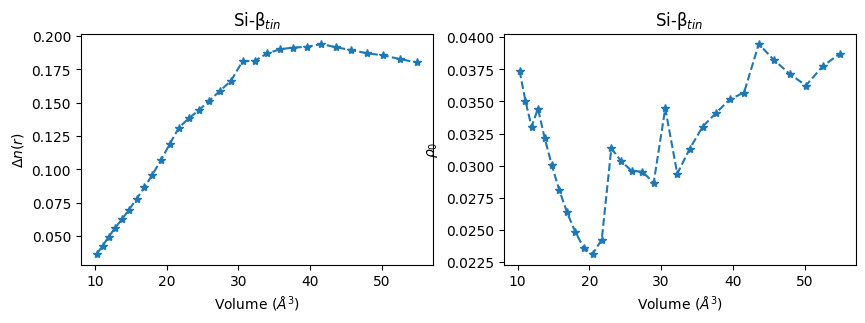

In [12]:
fig, axs = plt.subplots(1,2, figsize=(10,3))
im0 = axs[0].plot(np.asarray(vol)*0.529177**3/8,np.asarray(delta_rho)*1/8,'*--')
im1 = axs[1].plot(np.asarray(vol)*0.529177**3/8,np.asarray(R0),'*--')
axs[0].set_title('Si-\u03B2$_{tin}$')
axs[1].set_title('Si-\u03B2$_{tin}$')
axs[0].set_xlabel('Volume ($\AA^{3}$)')
axs[0].set_ylabel('$\Delta n(r)$')
axs[1].set_xlabel('Volume ($\AA^{3}$)')
axs[1].set_ylabel('$\u03C1_{0}$')

In [14]:
minn.x

array([0.03871501])

In [17]:
XC = Functional(type='XC',name='LDA')
HARTREE = Functional(type='HARTREE')
l = np.linspace(0.8, 1.4, 30)

for n in np.arange(29,30,1):
    i = int(n)
    rho_ks = io.read_density('/Users/Valeria/Documents/aiWT/Model_ML_function/training_set_data/ks_calculations/Si_8cd/DATA2/rho0'+str(i)+'.xsf')
    ions = Ions.from_ase(bulk('Si', 'diamond', a=5.43, cubic=True))
    cell = ions.get_cell()
    ions.set_cell(cell * l[i], scale_atoms=True) 
    minn =min_delta_rho(0.0225, rho_ks, ions)
    vol.append(ions.get_volume())


setting key: Si -> /Users/valeria/Documents/PP/ofpp/EAC/upf/blps/si.lda.upf
Step    Energy(a.u.)            dE              dP              Nd      Nls     Time(s)         
0       -2.384395628294E+01     -2.384396E+01   5.590656E+00    1       1       1.477449E-01    
!WARN : pAp small than zero :iter =  13 -4983374.936468657
1       -3.017028521099E+01     -6.326329E+00   2.689880E+01    14      2       1.068723E+00    
2       -3.114837721880E+01     -9.780920E-01   1.946672E+00    9       1       1.591368E+00    
3       -3.129805409352E+01     -1.496769E-01   6.442179E-01    14      1       2.362312E+00    
4       -3.134422357734E+01     -4.616948E-02   9.011667E-02    20      1       3.356534E+00    
5       -3.135042300237E+01     -6.199425E-03   1.591857E-02    13      1       4.017739E+00    
6       -3.135188751954E+01     -1.464517E-03   7.791690E-03    13      1       4.694327E+00    
7       -3.135267915679E+01     -7.916372E-04   1.430972E-03    23      1       5.853957E

In [18]:
minn

2.0370925556856294